<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO">

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map"/>

In [2]:
!pip install plotly==4.9.0
!pip install jupyterlab "ipywidgets>=7.5"
!jupyter labextension install jupyterlab-plotly@4.9.0
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.9.0
!jupyter labextension list

  Using cached plotly-4.9.0-py2.py3-none-any.whl (12.9 MB)
Processing /home/jovyan/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56/retrying-1.3.3-py3-none-any.whl
Building jupyterlab assets (build:prod:minimize)
Building jupyterlab assets (build:prod:minimize)
JupyterLab v2.2.8
Known labextensions:
   app dir: /opt/conda/share/jupyter/lab
        @bokeh/jupyter_bokeh v2.0.3  enabled  OK
        @jupyter-widgets/jupyterlab-manager v2.0.0  enabled  OK
        jupyter-matplotlib v0.7.4  enabled  OK
        jupyterlab-plotly v4.9.0  enabled  OK
        plotlywidget v4.9.0  enabled  OK


In [3]:
!jupyter lab build

[LabBuildApp] JupyterLab 2.2.8
[LabBuildApp] Building in /opt/conda/share/jupyter/lab
[LabBuildApp] Building jupyterlab assets (build:prod:minimize)


In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.cluster import DBSCAN
import plotly
import pandas as pd
from plotly.graph_objs import Scattermapbox
import  plotly.graph_objs as go

In [6]:
data_apr14 = pd.read_csv('uber-raw-data-apr14.csv')
data_may14 = pd.read_csv('uber-raw-data-may14.csv')
data_jun14 = pd.read_csv('uber-raw-data-jun14.csv')
data_jul14 = pd.read_csv('uber-raw-data-jul14.csv')
data_aug14 = pd.read_csv('uber-raw-data-aug14.csv')
data_sep14 = pd.read_csv('uber-raw-data-sep14.csv')
data_janjune15 = pd.read_csv('uber-raw-data-janjune-15.csv')

In [8]:
#for each df we create columns for month, day_name, day and hour
#Warning it takes 4-5 min

for df in [data_apr14, data_may14, data_jun14, data_jul14, data_aug14, data_sep14]:
   
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df['month'] =  df['Date/Time'].dt.month 
    df['day_name'] = df['Date/Time'].dt.day_name()
    df['day'] = df['Date/Time'].dt.day
    df['hour'] = df['Date/Time'].dt.hour

In [19]:
data_apr14.head()

Date/Time      Lat      Lon    Base  month day_name  hour  day
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512      4  Tuesday     0    1
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512      4  Tuesday     0    1
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512      4  Tuesday     0    1
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512      4  Tuesday     0    1
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512      4  Tuesday     0    1

 0    5417
-1     554
 1     315
 5     240
 3      83
 2      66
 4      33
Name: labels, dtype: int64
[-1  0  1  2  3  4  5]


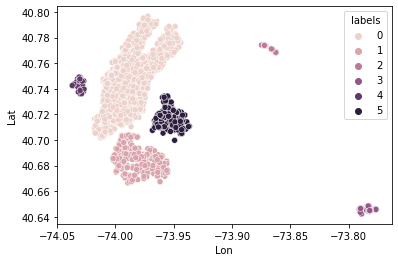

In [9]:
#We filter the data on day name and on hour
data = data_apr14.loc[(data_apr14['day_name'] == 'Friday') & (data_apr14['hour'] == 22), :]

X = data.loc[:,['Lon', 'Lat']]
#We try to adjust eps and min_sample so that we can find decent clusters

db = DBSCAN(eps = 0.0085, min_samples= 32 , metric = "manhattan", algorithm = "brute")
db.fit(X)

X['labels'] = db.labels_

print(X['labels'].value_counts())
print(np.unique(db.labels_))
X = X[X['labels']!= -1]


sns.scatterplot(x = X['Lon'], y = X['Lat'], hue = X['labels'])
plt.show()

In [10]:
# In April there is 4 Fridays, it would be useful to compute the average  
data['day'].unique()

array([ 4, 11, 18, 25])

In [11]:
data.head()

Date/Time      Lat      Lon    Base  month day_name  day  hour
5455 2014-04-04 22:00:00  40.7280 -73.9909  B02512      4   Friday    4    22
5456 2014-04-04 22:01:00  40.6816 -73.9769  B02512      4   Friday    4    22
5457 2014-04-04 22:01:00  40.7348 -74.0001  B02512      4   Friday    4    22
5458 2014-04-04 22:01:00  40.7444 -73.9808  B02512      4   Friday    4    22
5459 2014-04-04 22:02:00  40.7064 -74.0085  B02512      4   Friday    4    22

In [12]:
#we also want to compute the centers of each clusters so we can display it on the map

cluster_centers = X.groupby('labels')[['Lat', 'Lon']].mean() 
n_points = pd.DataFrame(X['labels']).value_counts(ascending = False).values


cluster_centers['number_of_people/month'] = n_points
#We compute the average
cluster_centers['number_of_p_average'] = (n_points/ (len(data['day'].unique()))).astype(int)
cluster_centers

Lat        Lon  number_of_people/month  number_of_p_average
labels                                                                   
0       40.740670 -73.991615                    5417                 1354
1       40.684505 -73.981279                     315                   78
2       40.772673 -73.869764                     240                   60
3       40.645948 -73.783213                      83                   20
4       40.742488 -74.030785                      66                   16
5       40.716299 -73.955379                      33                    8

In [18]:
# let's create a function to filter data by day and hour given a month
# We also add a remove_outliers function that will be usefull later. 

def select_date_time(df, month, day, hour, remove_outliers = False):
       
    if remove_outliers:
        mask = (df['month'] == month) & (df['day_name'] == day) & (df['hour'] == hour) \
                                      & (df['labels'] != -1)
    else:
        mask = (df['month'] == month) & (df['day_name'] == day) & (df['hour'] == hour)
       
    
    return df[mask]

In [41]:
#Now let's labelize the whole Dataset so we don't have to apply Dbscan anymore on it
#  /!\ WARNING IT TAKES 5 MIN /!\


labeled_data = pd.DataFrame()

for df in [data_apr14, data_may14, data_jun14, data_jul14, data_aug14, data_sep14]:
    
    months = [d for d in df.loc[:, 'month'].unique()]
    days = [d for d in df.loc[:, 'day_name'].unique()]
    hours = [h for h in df.loc[:, 'hour'].unique()]
    
    for m in months:
        for d in days:
            for h in hours:
                data = select_date_time(df, month = m, day = d, hour = h).copy()

                X = data.loc[:, ['Lon', 'Lat']]
                db = DBSCAN(eps = 0.0085 , min_samples = 32 , metric="manhattan", algorithm="brute")
                db.fit(X)
                data.loc[:,'labels'] = db.labels_
                labeled_data = pd.concat([labeled_data, data])

    
labeled_data.to_csv('labeled_data_full_dataset.csv')

In [15]:
labeled_data = pd.read_csv('labeled_data_full_dataset.csv')

##### The 'labeled_data' dataset can be downloaded <a href="https://drive.google.com/file/d/18rzfIv6N3G54xnMLLwQ-cGmVKpdE7skX/view?usp=sharing" target="_blank">Here</a>

In [16]:
# We want to make sure we didn't miss any row of the dataframe by accident:

len(labeled_data) == sum([len(df) for df in [data_apr14, data_may14, data_jun14, data_jul14, data_aug14, data_sep14]])

True

In [17]:
# After we have applied the filters with the function select_date_time,
# We also want to create a function to get automaticly
# The centers coordinates of a cluster and count the amont of people on each one.


def get_centers(df):
    #we remove outliers
    data_without_outliers = df.loc[df['labels'] != -1,:]
    
    cluster_info = data_without_outliers.groupby('labels')[['Lat', 'Lon']].mean()
    n_points = pd.DataFrame(data_without_outliers['labels']).value_counts(ascending = False).values #we count the number of points for each cluster
    cluster_info['number_of_people/month'] = n_points
    cluster_info['number_of_people/day_average'] = (n_points / (len(data_without_outliers['day'].unique()))).astype(int)
    cluster_info = cluster_info.sort_values('number_of_people/day_average', ascending = False)
    
    return(cluster_info)

In [19]:
#let's create a function to select data and plot it on a map

def select_data_and_plot(df,month, day, hour):
    
#Preprocessing 

    #We filter on the desired month, day, and hour and we remove outliers
    data = select_date_time(df, month, day, hour, remove_outliers = True)
    #We get centers coordinates of each cluster
    cluster_centers = get_centers(data)


    #Plotly
    mapbox_access_token = 'pk.eyJ1IjoiYW5pc3pha2FyaSIsImEiOiJja2k4MG4xZW0wMTZwMnFwanVvdG5sMWpqIn0.MGKzhSzS6zaZRQM14fAPcQ'
    fig = go.Figure()

    #creating outlines for markers

    fig.add_trace(go.Scattermapbox(
            lat = data['Lat'],
            lon = data['Lon'],
            name = 'Position of potential clients (whole month)',
            mode = 'markers',
            marker = dict(
                size = 7,
                color = 'blue',
                opacity = 0.7
            )
        )) 

    #dots for a given month
    fig.add_trace(go.Scattermapbox(
            lat = data['Lat'],
            lon = data['Lon'],
            mode = 'markers',
            showlegend = False,
            marker = dict(
                size = 6,
                color = data['labels'],
                colorscale = 'Blugrn',
                opacity = 0.6
            )
        )) 


    #Red bubles with average number of people
    fig.add_trace(go.Scattermapbox(
            lat = cluster_centers['Lat'],
            lon = cluster_centers['Lon'],
            mode = 'markers+text',
            name = 'Average number of potential clients for the selected hour (for a selected day of the week, on a given month)',
            textposition = 'middle center',
            text = [str(n) for n in cluster_centers['number_of_people/day_average']], #It displays average number of people for a given hour, a given day, in a given month
            textfont = dict( color = 'white', family = 'Calibri', size = 14),
            marker = dict(
                size = np.log(cluster_centers['number_of_people/day_average'])*20, #we use log so that the difference in size is not extreme between 2 Bubbles
    #            color ='rgb(51, 53, 255)',
                color = 'rgb(255, 0, 0)',
    #           color = 'rgb(102, 204, 0)',
                opacity=0.6,
            ),
            hoverinfo='none'
            
        ))


    fig.update_layout(
            title = dict(text = 'Hot Zones based on uber data', x = 0.5),
            font = dict(family='Tw Cen MT, monospace', size=24, color='rgb(0,0,0)'),
            autosize = True,
            hovermode = 'closest',
            showlegend=True,
            width=1000,
            height=700,
            legend=dict(yanchor="top", y=0.00005,xanchor="center",x=0.5,
                        borderwidth = 1,
                        font = dict (family="Courier", size=12, color="black")
                       ),

            mapbox=dict(
                accesstoken = mapbox_access_token,
                center = dict(lat = cluster_centers['Lat'].mean() , lon = cluster_centers['Lon'].mean()),
                bearing = 0,
                pitch = 0,
                zoom = 9.8,
    #            style = 'outdoors'
    #            style = 'dark'
    #            style = 'light'
                style = 'streets'
            ),
        )                    


    fig.show()

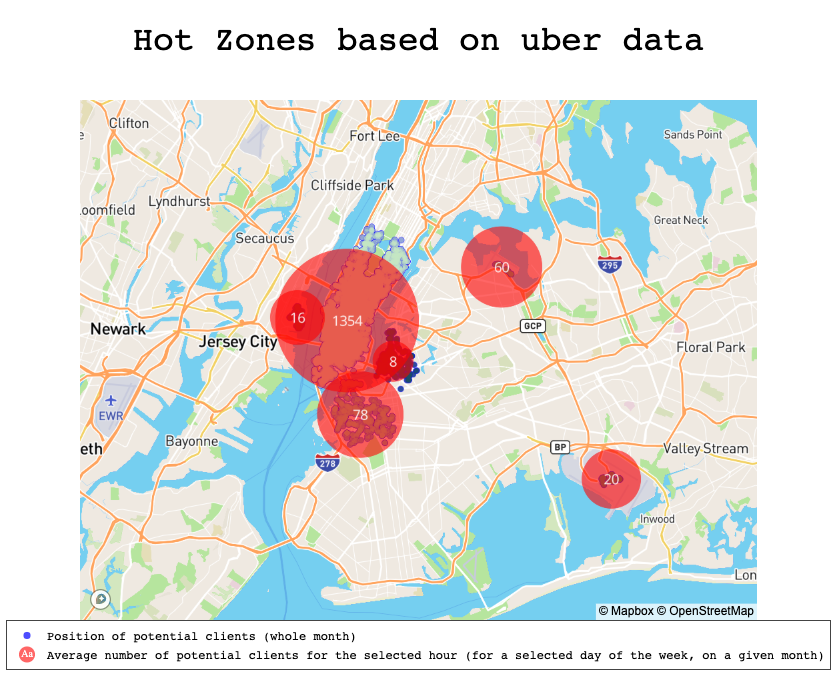

In [20]:
select_data_and_plot(labeled_data, month = 4, day = 'Friday', hour = 22) 

In [21]:
# We just combine the 2 functions 'select_date_time' and 'get_centers' to do all the things at once.
# So that we can reduce afterward the original dataset to less than 1Mb

def select_data_and_get_centers(df, month, day, hour ):
    data = select_date_time(df = df, month = month, day = day, hour = hour)
    centers_info = get_centers(data)
    centers_info['month'] = [month]*len(centers_info)
    centers_info['day_name'] = [day]*len(centers_info)
    centers_info['hour'] = [hour]*len(centers_info)
    return(centers_info)

In [22]:
select_data_and_get_centers(df = labeled_data, month = 4, day = 'Friday', hour = 22)

Lat        Lon  number_of_people/month  \
labels                                                 
0       40.740670 -73.991615                    5417   
1       40.684505 -73.981279                     315   
2       40.772673 -73.869764                     240   
3       40.645948 -73.783213                      83   
4       40.742488 -74.030785                      66   
5       40.716299 -73.955379                      33   

        number_of_people/day_average  month day_name  hour  
labels                                                      
0                               1354      4   Friday    22  
1                                 78      4   Friday    22  
2                                 60      4   Friday    22  
3                                 20      4   Friday    22  
4                                 16      4   Friday    22  
5                                  8      4   Friday    22

In [23]:
# Now we want to reduce the dataset and only keep the data about the cluster centers
# Warning it takes 3-4 min
centers_info_dataset = pd.DataFrame()
months = labeled_data['month'].unique()

for month in months:
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        for hour in range(24):
            data = select_data_and_get_centers(df = labeled_data, month = month, day = day, hour = hour)
            centers_info_dataset = pd.concat([centers_info_dataset, data])

centers_info_dataset.to_csv('centers_info_dataset.csv')


##### The 'centers_info_datasets' file can be downloaded <a href="https://drive.google.com/file/d/1oneMO1B6xKeG0tSDi4gkpKUZJa-sjnpN/view?usp=sharing" target="_blank">Here</a>

In [24]:
centers_info_dataset = pd.read_csv('centers_info_dataset.csv')

In [17]:
centers_info_dataset.loc[(centers_info_dataset['month'] == 4) & (centers_info_dataset['day_name'] == 'Friday') \
                         & (centers_info_dataset['hour'] == 22),:]

labels        Lat        Lon  number_of_people/month  \
474       0  40.740670 -73.991615                    5417   
475       1  40.684505 -73.981279                     315   
476       2  40.772673 -73.869764                     240   
477       3  40.645948 -73.783213                      83   
478       4  40.742488 -74.030785                      66   
479       5  40.716299 -73.955379                      33   

     number_of_people/day_average  month day_name  hour  
474                          1354    4.0   Friday  22.0  
475                            78    4.0   Friday  22.0  
476                            60    4.0   Friday  22.0  
477                            20    4.0   Friday  22.0  
478                            16    4.0   Friday  22.0  
479                             8    4.0   Friday  22.0

In [25]:
data.loc[(data['day_name']== 'Friday') & (data['hour'] == 22),'number_of_people/day_average']

Series([], Name: number_of_people/day_average, dtype: int64)

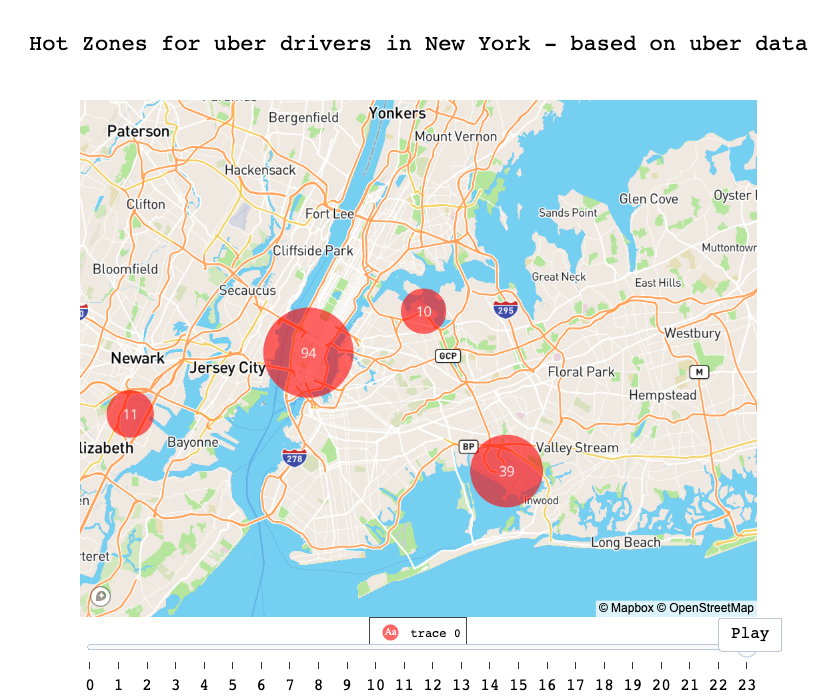

In [34]:
#let's create an animation with the same scattermap


data = centers_info_dataset.loc[(centers_info_dataset['month'] == 4),:]


#Plotly
mapbox_access_token = 'pk.eyJ1IjoiYW5pc3pha2FyaSIsImEiOiJja2k4MG4xZW0wMTZwMnFwanVvdG5sMWpqIn0.MGKzhSzS6zaZRQM14fAPcQ'
fig = go.Figure()

#creating outlines for markers

fig.add_trace(go.Scattermapbox(
        lat = data.loc[:, 'Lat'].head(0),
        lon = data.loc[:, 'Lon'].head(0),
        mode = 'markers',
        marker = dict(
            size = 1,
            color = 'blue',
            opacity = 0.7
        )
    )) 



frames = [
        go.Frame(data = 
                [go.Scattermapbox(
                   lat = data.loc[(data['day_name'] == 'Sunday') & (data['hour'] == k), 'Lat'], 
                   lon = data.loc[(data['day_name'] == 'Sunday') & (data['hour'] == k), 'Lon'],
                   mode = 'markers+text',
                   text = [str(n) for n in data.loc[(data['day_name'] == 'Sunday') & (data['hour'] == k), 'number_of_people/day_average']], #It displays average number of people for a given hour, a given day, in a given month
                   textfont = dict( color = 'white', family = 'Calibri', size = 14),
                   marker = dict(
                            size = np.log(data.loc[(data['day_name'] == 'Sunday') & (data['hour'] == k), 'number_of_people/day_average'])*20, #we use log so that the difference in size is not extreme between 2 Bubbles
                            color = 'rgb(255, 0, 0)',
                            opacity=0.6,),
                    hoverinfo='none'
                        )
                ], 
                traces = [0],
                name = f'frame{k}' )for k  in  range(24)
         ]  






fig.update(frames = frames);
sliders = [dict(
                steps = [dict( method = 'animate',
                               args = [
                                          [ f'frame{k}'],
                                          dict(mode = 'immediate', frame = dict(duration=100, redraw= True ),
                                          transition = dict( duration= 1))
                                     ],
                            label ='{:d}'.format(k)
                             )
                         for k in range(24)
                        ], 
                transition = dict(duration = 0 ),
                x =  0,#slider starting position  
                y = 0, 
                currentvalue = dict(
                                   font = dict(size = 12), 
                                   prefix = 'hour: ', 
                                   visible = False, 
                                   xanchor = 'center'
                                   ),  
                len = 1.0
                )
           ]
fig.update_layout(
    updatemenus = [ dict(type = 'buttons',
                         showactive = False,
                         y = 0,
                         x = 1.05,
                         xanchor = 'right',
                         yanchor = 'top',
                         pad = dict(t = 0, r = 10),
                         buttons = [dict(label = 'Play',
                                         method = 'animate',
                                         args = [None, 
                                                dict(frame = dict(duration = 1000, 
                                                                redraw = True),
                                                     transition = dict(duration = 2),
                                                     fromcurrent = True,
                                                     mode = 'immediate'
                                                    )
                                               ]
                                         )
                                    ]
                           )
                      ],
              sliders=sliders);






fig.update_layout(
        title = dict(text = 'Hot Zones for uber drivers in New York - based on uber data', x = 0.5),
        font = dict(family='Tw Cen MT, monospace', size=16, color='rgb(0,0,0)'),
        autosize = True,
        hovermode = 'closest',
        showlegend=True,
        width=1000,
        height=700,
        legend=dict(yanchor="top", y=0.00005,xanchor="center",x=0.5,
                    borderwidth = 1,
                    font = dict (family="Courier", size=12, color="black")
                   ),

        mapbox=dict(
            accesstoken = mapbox_access_token,
            center = dict(lat = centers_info_dataset['Lat'].mean() , lon = centers_info_dataset['Lon'].mean()),
            bearing = 0,
            pitch = 0,
            zoom = 9.8,
#            style = 'outdoors'
#            style = 'dark'
#            style = 'light'
            style = 'streets'
        ),
    )                    

fig.show()


In [35]:
#let's create a function so that we can choose the day and the month 
def plot_animation(df, month, day):
    
    data = df.loc[(df['month'] == month),:]


    #Plotly
    mapbox_access_token = 'pk.eyJ1IjoiYW5pc3pha2FyaSIsImEiOiJja2k4MG4xZW0wMTZwMnFwanVvdG5sMWpqIn0.MGKzhSzS6zaZRQM14fAPcQ'
    fig = go.Figure()

    #creating outlines for markers

    fig.add_trace(go.Scattermapbox(
            lat = data.loc[:, 'Lat'].head(0),
            lon = data.loc[:, 'Lon'].head(0),
            mode = 'markers',
            marker = dict(
                size = 1,
                color = 'blue',
                opacity = 0.7
            )
        )) 



    frames = [
            go.Frame(data = 
                    [go.Scattermapbox(
                       lat = data.loc[(data['day_name'] == day) & (data['hour'] == k), 'Lat'], 
                       lon = data.loc[(data['day_name'] == day) & (data['hour'] == k), 'Lon'],
                       mode = 'markers+text',
                       text = [str(n) for n in data.loc[(data['day_name'] == day) & (data['hour'] == k), 'number_of_people/day_average']], #It displays average number of people for a given hour, a given day, in a given month
                       textfont = dict( color = 'white', family = 'Calibri', size = 14),
                       marker = dict(
                                size = np.log(data.loc[(data['day_name'] == day ) & (data['hour'] == k), 'number_of_people/day_average'])*20, #we use log so that the difference in size is not extreme between 2 Bubbles
                                color = 'rgb(255, 0, 0)',
                                opacity=0.6,),
                        hoverinfo='none'
                            )
                    ], 
                    traces = [0],
                    name = f'frame{k}' )for k  in  range(24)
             ]  






    fig.update(frames = frames);
    sliders = [dict(
                    steps = [dict( method = 'animate',
                                   args = [
                                              [ f'frame{k}'],
                                              dict(mode = 'immediate', frame = dict(duration=100, redraw= True ),
                                              transition = dict( duration= 1))
                                         ],
                                label ='{:d}'.format(k)
                                 )
                             for k in range(24)
                            ], 
                    transition = dict(duration = 0 ),
                    x =  0,#slider starting position  
                    y = 0, 
                    currentvalue = dict(
                                       font = dict(size = 12), 
                                       prefix = 'hour: ', 
                                       visible = False, 
                                       xanchor = 'center'
                                       ),  
                    len = 1.0
                    )
               ]
    fig.update_layout(
        updatemenus = [ dict(type = 'buttons',
                             showactive = False,
                             y = 0,
                             x = 1.05,
                             xanchor = 'right',
                             yanchor = 'top',
                             pad = dict(t = 0, r = 10),
                             buttons = [dict(label = 'Play',
                                             method = 'animate',
                                             args = [None, 
                                                    dict(frame = dict(duration = 1000, 
                                                                    redraw = True),
                                                         transition = dict(duration = 2),
                                                         fromcurrent = True,
                                                         mode = 'immediate'
                                                        )
                                                   ]
                                             )
                                        ]
                               )
                          ],
                  sliders=sliders);






    fig.update_layout(
            title = dict(text = 'Hot Zones for uber drivers in New York - based on uber data', x = 0.5),
            font = dict(family='Tw Cen MT, monospace', size=16, color='rgb(0,0,0)'),
            autosize = True,
            hovermode = 'closest',
            showlegend=True,
            width=1000,
            height=700,
            legend=dict(yanchor="top", y=0.00005,xanchor="center",x=0.5,
                        borderwidth = 1,
                        font = dict (family="Courier", size=12, color="black")
                       ),

            mapbox=dict(
                accesstoken = mapbox_access_token,
                center = dict(lat = df['Lat'].mean() , lon = df['Lon'].mean()),
                bearing = 0,
                pitch = 0,
                zoom = 9.8,
    #            style = 'outdoors'
    #            style = 'dark'
    #            style = 'light'
                style = 'streets'
            ),
        )                    

    return(fig.show())


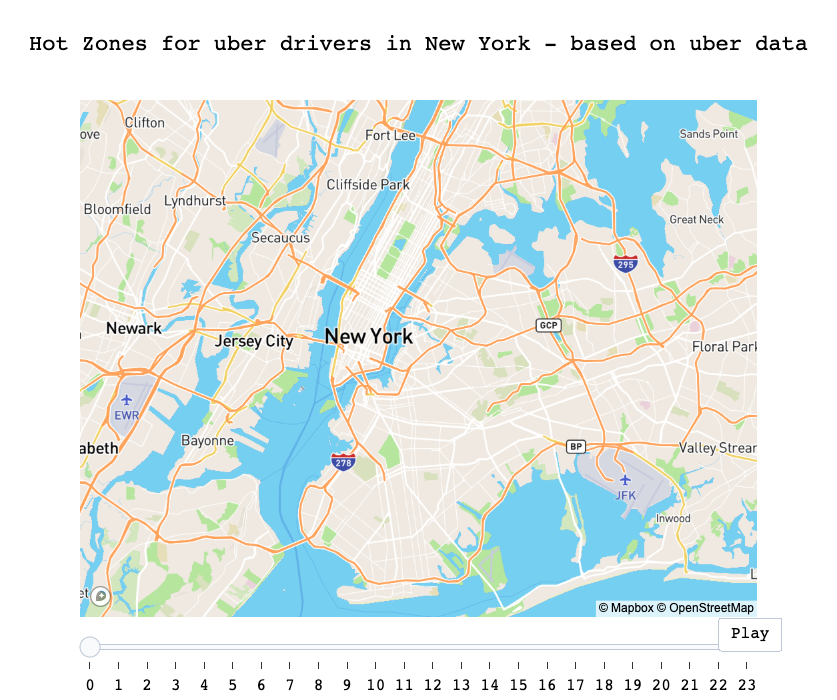

In [36]:
plot_animation(centers_info_dataset, month = 4, day = 'Saturday')